# Multi-Spike Tempotron Project Report

## 1 Introduction

The ability of a neuron to identify specific features and distinguish them from the distractors and background activity is important in detecting the associations between the hidden clues. This neuronal property has significant biological implications and is crucial for the survival of an organism. For instance, certain sounds and odors might be the signals of a danger and the association between these clues and the delayed consequences are essential for the survival of an organism in the future. 

However, it is challenging to associate the clues and the delayed outcomes in both biological and machine learning. In 2016, Robert Gütig suggested a concept called aggregate-label learning where the postsynaptic neuron only receives a feedback that is proportional to the number of clues with no information of the exact occurring time and the absolute number of the clues. The author then proposed a gradient-based learning algorithm, multi-spike tempotron, in order to fulfill the requirements of implementing the aggregate-label learning concept. 

In fact, binary tempotron, a simplified, binary version of the multi-spike tempotron, has been proposed in 2006 by Gütig and Sompolinsky. The binary tempotron can be trained to fire at least one spike in response to a specific spike pattern (clue) and remain silent otherwise. However, it has problem in controlling the number of spikes greater than one. Therefore, multi-spike tempotron was proposed for solving this problem.

The multi-spike tempotron is an approach to modify the synaptic efficacies along the steepest path that allows the postsynaptic neuron to fire a desired number of output spikes (Robert Gütig, 2016). It is implemented by computing the exact gradient of the critical threshold, which is the maximum threshold that can elicit a specific number of spikes in postsynaptic neuron. The author declares that the multi-spike tempotron can identify the occurring time and the number of clues after training. In other words, the trained multi-spike tempotron will fire a desired number of spikes at the occurring time of the clue and remain silent when the clue is absent. 

Besides multi-spike tempotron, the author also implemented the aggregate-label learning concept with a simpler and biological more plausible learning rule, which is correlation-based learning. Correlation-based learning is a Hebbian-like learning rule that associates the arrival time of the presynaptic input spikes with the voltage of the postsynaptic neuron. 

The aims of the present project are to test the feasibility of the multi-spike tempotron learning rule and to evaluate the validity of the aggregate-label learning concept by using both multi-spike tempotron and correlation-based learning rules.

## 2 Materials and Methods

### 2.1 Training procedures

In this project, 20000 sets of presynaptic spike pattern were generated (section 2.2) with normalized PSP kernel (Eq. 1) precomputed without information of synaptic efficacies. These data sets were kept in a pool and retrieved during training to reduce the time for computation. During training, the synaptic efficacies were updated after each error trial. One cycle of training is defined as 100 trials. The synaptic efficacy of each synapse was updated after each error trial and recorded after each cycle of training. The neural responses of the postsynaptic neuron (section 2.5) were then computed and visualized by plotting the learning curves. Both correlation-based learning (section 2.4.1) and multi-spike tempotron (section 2.4.3) were trained by the same procedures.

A total of five different tasks were performed to evaluate the correlation-based and multi-spike tempotron learning rules:

    (A) identification of one clue out of ten features with one spike (1F1S)
    (B) identification of one clue out of ten features with five spikes (1F5S)
    (C) identification of five clues out of ten features with one spike (5F1S)
    (D) identification of five clues out of ten features with different number of spikes (5FmS)
    (E) identification of five clues out of ten features with five spikes (5F5S)

### 2.2 Generation of presynaptic input spikes and features

The input spikes of 500 presynaptic neurons were fed to a single postsynaptic neuron. The spikes of the presynaptic neurons were generated randomly with an average firing rate of 5 Hz (appendix, section 5.1, code file A). The features (clues and distractors) were generated by same procedures with duration of 50 ms for each feature. The duration of the background activity is 500 ms and the features were randomly inserted within the background activity (Fig. 1). In this project, 10 features were generated with average of two occurrences per feature per trial drawing from poisson distribution.

### 2.3 Neuron model

The current-based leaky integrate-and-fire neuron model with reset was used for this project.

The normalized postsynaptic potential (PSP) kernel was computed by

$$K(t-t_i^j)=V_\text{norm}\bigg[\exp\bigg(-\frac{t-t_i^j}{\tau_\text{m}}\bigg)-\exp\bigg(-\frac{t-t_i^j}{\tau_\text{s}}\bigg)\bigg] \qquad (1)$$

where $t_i^j$ is the input spike time, $\tau_\text{m}$ is the integration time constant of the postsynaptic membrane, $\tau_\text{s}$ is the decay time constant of synaptic currents, and $V_\text{norm}=\eta^{[\eta/(\eta-1)]}/(\eta-1)$ with $\eta=\tau_\text{m}/\tau_\text{s}$. $\tau_\text{m} = 20$ ms and $\tau_\text{s} = 5$ ms were used for calculating the PSP kernel.

The postsynaptic membrane potential $V(t)$ was calculated by

$$V(t)=V_\text{rest}+\sum_{i=1}^N\omega_i\sum_{t_i^j<{t}}K(t-t_i^j)-\vartheta\sum_{t_\text{spike}^j<{t}}\exp\bigg(-\frac{t-t_\text{spike}^j}{\tau_\text{m}}\bigg) \qquad (2)$$

where $V_\text{rest}$ is the resting membrane potential and was set to zero, $\omega_i$ is the individual synaptic efficacy of the afferent neurons that were generated randomly, $\vartheta$ is the firing threshold of the postsynaptic neuron, and $t_\text{spike}^j$ is the output spike time of the postsynaptic neuron.

### 2.4 Learning rules

#### 2.4.1 Correlation-based learning

The correlation-based learning updates the most eligible synapses (appendix, section 5.1, code file B). The eligibility of $i$th presynaptic neuron is given by $\mathcal{E}_i=\sum_{t_i^j}\mathcal{V}_i^j$, in which $\mathcal{V}_i^j$ is the individual presynaptic-spike-correlation with $$\mathcal{V}_i^j=\int_{t_i^j}^\infty dtV(t)K(t-t_i^j) \qquad (3)$$ 

The 10% most eligible synapses were updated by increasing or decreasing their synaptic efficacies by $\lambda_\mathcal{V}=1\text{e}^{-5}$ (learning rate) after each error trial 

$$\Delta\omega_i^\pm = \begin{cases} \pm\lambda_\mathcal{V} \text{ if } \mathcal{E}_i > D_9 \\ 0 \text{ if } \mathcal{E}_i ≤ D_9 \end{cases} \qquad (4)$$
where $D_9$ denotes the 9th decile.

#### 2.4.2 Spike-threshold-surface

The spike-threshold-surface (STS) is a function of output spike number against its corresponding threshold value ($\vartheta$). The critical threshold ($\vartheta_k^\star$) is the threshold value at which the number of output spikes increases from $k-1$ to $k$. Therefore, $\vartheta_k^\star$ is the maximum threshold value that can elicit $k$ spikes with $ \text{STS}(\vartheta_{k+1}^\star < \vartheta < \vartheta_k^\star) = k $. As the postsynaptic neuron will remain silent if its firing threshold lies above the maximum postsynaptic voltage $V_\text{max}$, $ \text{STS}(\vartheta > V_\text{max}) = 0 $. When $\vartheta = V_\text{max}$, the first spike is elicited and the current $\vartheta$ is the critical threshold for one spike ($\vartheta_1^\star$). Thus, $\vartheta_1^\star = V_\text{max}$.

#### 2.4.3 Multi-spike tempotron 

Each data set (input spike pattern) generated has its unique STS. The main objective of the multi-spike tempotron algorithm is to adjust the positions of critical thresholds ($\vartheta_k^\star$) on STS toward the desired output spike number by modifying the synaptic efficacy of each synapse, thus reshaping the STS. This approach replaces the discrete number of output spikes with the distance between the fixed intrinsic threshold of the neuron and the closest hypothetical threshold of the desired spike number ($\vartheta_k^\star$). This renders the function differentiable as each $\vartheta_k^\star$ corresponds to a voltage value that can be calculated by Eq. 2, which is a function of synaptic efficacies $\vec{\omega}$. 

The multi-spike tempotron is implemented by computing the gradient of the critical threshold $\vartheta_k^\star$ (appendix, section 5.1, code file C), such that after each error trial the synaptic efficacies are updated by 
$$\vec{\Delta}\omega=\begin{cases} -\lambda \vec{\nabla}_\vec{\omega} \vartheta_o^\star \text{ if } o>d \\ \lambda \vec{\nabla}_\vec{\omega} \vartheta_{o+1}^\star \text{ if } o < d \end{cases} \qquad (5)$$

where $o$ is the output spike number, $d$ is the desired spike number, and learning rate $\lambda > 0$ is the size of update.

##### 2.4.3.1 Calculating $\vartheta^\star$-gradient

After each error trial, the possible range of $\vartheta_k^\star$ is narrowed by interval halfing until a predetermined smallest range ($10^{-5}$) is reached, with upper bound being the threshold $\vartheta$ that elicits $k-1$ spikes and lower bound being $\vartheta$ that elicits $k$ spikes. Then, $\vartheta_k^\star$ is determined by finding the root of $[\vartheta - v_{\text{max}}(\vartheta)]$, where $v_{\text{max}}(\vartheta)$ is the subthreshold maximum voltage value, which is the maximum voltage value that does not reach the threshold. 

By setting the threshold to critical spike threshold $\vartheta^\star$, the postsynaptic voltage $V(t)$ from Eq. 2 can be written as

$$ V(t) = V_o(t) - \vartheta^\star \sum_{t_s^j<{t}}\exp\bigg[\frac{-(t-t_s^j)}{\tau_\text{m}}\bigg] \qquad (6)$$

where $$ V_o(t) = \sum_{i=1}^N\omega_i\sum_{t_i^j < t}K(t-t_i^j) \qquad (7)$$ gives the unresetted voltage values. 

The author assumes that there is always a unique $t^\star$ for any given $\vartheta^\star$ such that 

$$ \begin{align*} \vartheta^\star &= V(t^\star) \\ & = V_o(t^\star) - \vartheta^\star \sum_{j=1}^m \exp\bigg[\frac{-(t^\star -t_s^j)}{\tau_\text{m}}\bigg] &&(8) \end{align*}$$ 

where $m$ is the number of output spikes elicited before $t^\star$ and $ t_s^j < t^\star \text{ for } j \in \{ 1, \dotsc, m \} $.

As the postsynaptic voltage is reseted if it reaches the threshold, all spike times, including $t_s^j$ and $t^\star$ should satisfy 

$$ \vartheta^\star = V(t^\star) = V(t_s^j) \qquad (9)$$

Thus, for each presynaptic input $ i \in \{ 1, ..., N \} $, 
$$ \vartheta_i^{\star'} \equiv \frac{\text{d}}{\text{d}\omega_i} \vartheta^\star = \frac{\text{d}}{\text{d}\omega_i} V(t^\star) = \frac{\text{d}}{\text{d}\omega_i} V(t_s^j) \qquad (10)$$ 

where the $\vartheta_i^{\star'}$ is the $i$th component of the desired gradient.

The derivative of $\vartheta^\star$ with respect to $\omega_i$ is as follows (for derivation, see appendix, section 5.2.1)

$$ \vartheta_i^{\star'} = \frac{∂}{∂ \omega_i} V(t^\star) + \sum_{j=1}^m \frac{∂}{∂ t_s^j} V(t^\star) \frac{\text{d}}{\text{d} \omega_i} t_s^j \qquad (11)$$ 

where the last term $ \frac{∂}{∂ t^\star} V(t^\star) \frac{\text{d}}{\text{d} \omega_i} t^\star = 0 $ is omitted because the $V(t^\star)$ is a local maximum with $∂V(t^\star)/∂t^\star = 0$. Likewise, 

$$ \frac{\text{d}}{\text{d} \omega_i} V(t_s^k) = \frac{∂}{∂ \omega_i} V(t_s^k) + \sum_{j=1}^k \frac{∂}{∂ t_s^j} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^j \qquad (12)$$ 
for all $k\in\{1,...,m\}$.

From Eq. 12, we obtain (for derivation, see appendix, section 5.2.2) 

$$\frac{\text{d}}{\text{d} \omega_i} t_s^k = \frac{1}{\dot{V}(t_s^k)} \bigg[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^k) - \sum_{j=1}^{k-1} \frac{∂}{∂ t_s^j} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^j \bigg] \qquad (13)$$ 

with the time derivatives 
$$\dot{V}(t_s^k) \equiv \frac{∂}{∂t}V(t) \big|_{t=t_s^k} \qquad (14)$$

For Eq. 11, the $\vartheta_i^{\star'}$ can be solved by refactoring Eq. 13 as 
$$\frac{\text{d}}{\text{d} \omega_i} t_s^k = \frac{1}{\dot{V}(t_s^k)} [\vartheta_i^{\star'}A_k + B_k] \qquad (15)$$ 

with $A_k$ and $B_k$ as the recursive equations (for derivation, see appendix, section 5.2.3)

$$ A_k = 1 - \sum_{j=1}^{k-1} \frac{A_j}{\dot{V}(t_s^j)} \frac{∂}{∂t_s^j} V(t_s^k) \qquad (16)$$ 

$$ B_k = - \frac{∂}{∂\omega_i} V(t_s^k) - \sum_{j=1}^{k-1} \frac{B_j}{\dot{V}(t_s^j)} \frac{∂}{∂t_s^j} V(t_s^k) \qquad (17)$$ 

At $t^\star$, $A_k$ and $B_k$ can be written as

$$ A_\star = 1 - \sum_{j=1}^m \frac{A_j}{\dot{V}(t_s^j)} \frac{∂}{∂t_s^j} V(t^\star) \qquad (18)$$ 

$$ B_\star = - \frac{∂}{∂\omega_i} V(t^\star) - \sum_{j=1}^m \frac{B_j}{\dot{V}(t_s^j)} \frac{∂}{∂t_s^j} V(t^\star) \qquad (19)$$ 

and we can obtain $\vartheta_i^{\star'}$ by inserting Eq. 15 into Eq. 11 (for derivation, see appendix, section 5.2.4). 

$$ \vartheta_i^{\star'} = - \frac{B_\star}{A_\star} \qquad (20)$$ 

At each spike time $ t_x \in \{ t_s^1, t_s^2, t_s^3,..., t_s^m, t^\star \} $, Eq. 6 is reduced to (for derivation, see appendix, section 5.2.5) 

$$ V(t_x) = \frac{V_o(t_x)}{C_{t_x}} \qquad (21)$$ 
with 
$$ C_{t_x} \equiv 1 + \sum_{t_s^j < t_x} \exp\bigg[ \frac{-(t_x-t_s^j)}{\tau_\text{m}} \bigg] \qquad (22)$$

The derivatives of Eq. 21 are as follows (for derivation, see appendix, section 5.2.6):

$$ \begin{align*} \frac{∂}{∂ \omega_i} V(t_x) &= \frac{1}{C_{t_x}} \frac{∂}{∂ \omega_i} V_o(t_x) \\ &= \frac{1}{C_{t_x}} \sum_{t_i^j < t_x} K(t_x - t_i^j) && (23) \end{align*} $$

$$ \frac{∂}{∂ t_s^k} V(t_x) = \frac{-V_o(t_x)}{C_{t_x}^2} \frac{\exp \big[ \frac{-(t_x - t_s^k)}{\tau_\text{m}} \big]}{\tau_\text{m}} \text{ for } t_s^k < t_x \qquad (24)$$

$$ \dot{V}(t_x) = \frac{1}{C_{t_x}^2} \bigg( C_{t_x} \frac{∂}{∂t_x} V_o(t_x) + \frac{V_o(t_x)}{\tau_\text{m}} \sum_{t_s^j < t_x} \exp\bigg[ \frac{-(t_x - t_s^j)}{\tau_\text{m}} \bigg] \bigg) \qquad (25)$$

### 2.5 Computing neural responses for plotting learning curves

Neural responses of the postsynaptic neuron are computed to visualize the learning process (appendix, section 5.1, code file D). The mean response (number of spikes) $R_y^\text{mean}$ of the postsynaptic neuron in response to a feature $y$ was measured by using 100 probe trials per learning cycle. Each probe trial consists of 1.95 seconds of random background activity with either 50 ms of empty gap or feature activity pattern inserted halfway within the background activity, making up a total duration of 2 seconds. The number of output spikes for each probe trial was measured twice, once with empty gap inserted ($s_\emptyset$) and another with feature activity pattern inserted ($s_y$). If the number of features used was greater than one, then the output spike number of each probe trial was measured with each of the feature inserted. 

The $R_y^\text{mean}$ was calculated by obtaining the mean difference in the output spike number between $s_\emptyset$ and $s_y$ over the 100 independent probe trials, thus 

$$R_y^\text{mean}=\langle s_y-s_\emptyset \rangle \qquad (26)$$

On the other hand, to measure the response of the postsynaptic neuron to background activity in the absence of feature ($R_\emptyset^\text{mean}$), the mean spike rate (Hz) of the probe trials with empty gap inserted were obtained by 
$$ R_\emptyset^\text{mean} = \frac{\langle s_\emptyset \rangle} {T_\text{probe}} \qquad (27)$$
with the average $s_\emptyset$ taken over the 100 probe trials. 

#### 2.5.1 Adding noise to features

To test the flexibility of the neuron in identifying the clues after training, noise can be added to the feature activity pattern when computing the neural responses. Two major types of noise were used in this project, namely random input-spike deletion (or addition) and presynaptic spike time jitter. The presynaptic spikes were randomly deleted with a probability of 0.2. For spike time jitter, the spike time was shifted by a noise drawing from Gaussian distribution with zero mean and standard deviation of 2 ms.

## 3 Results

### 3.1 Correlation-based learning can reliably identify the clues by aggregate-label feedback

After 1000 cycles of training with correlation-based learning rule, the postsynaptic neuron can learn to identify the hidden clues from aggregate-label feedback (Fig. 2 and 3). For tasks A and C, the learning curves converged to the desired spike number and became stable at about cycle 200 of the training (Fig. 3a and 3e). For tasks B, D, and E, the postsynaptic neuron reached the optimal performance at about cycle 800 (Fig. 3c, 3g, and 3i).

In general, the neural responses for background activity were decreased as the training progressed. The random spiking in response to background activity reduced to nearly zero after 1000 cycles of training in task A (Fig. 3a) and about 1 Hz in tasks B (Fig. 3c) and C (Fig. 3e). However, the neural responses for background activity stayed high after 1000 cycles of training in tasks D (Fig. 3g) and E (Fig. 3i), which are about 6 Hz and 15 Hz respectively.

The neural responses were significantly depressed in response to the noise-added clues. In tasks A and C, the learning effects of the postsynaptic neuron were abolished (Fig. 3b and 3f). For tasks B, D, and E, the learning effects were significantly reduced but not abolished (Fig. 3d, 3h, and 3j).

(0, 550)

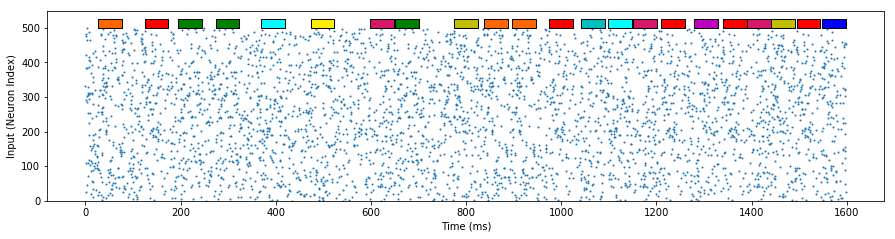

In [1]:
from V_trace import multi_Vplot
from l_curve import *
%matplotlib inline

input_data = np.load("test_input_spikes.npz")
data, markers = input_data['arr_0'], input_data['arr_2']

matplotlib.rcParams['figure.figsize'] = (15.0, 3.5)

y,x = np.argwhere(data == 1).T
plt.scatter(x, y, s = 1)
plt.xlabel('Time (ms)')
plt.ylabel('Input (Neuron Index)')
for marker in markers:
    plt.gca().add_patch(marker)
plt.ylim((0, 550))

$\textbf{Figure 1: Raster plot of the presynaptic input activity.}$ Ten color coded features are embedded within the random background activity. The presynaptic neurons have an average firing rate of 5 Hz and the duration of the feature activity is 50 ms.

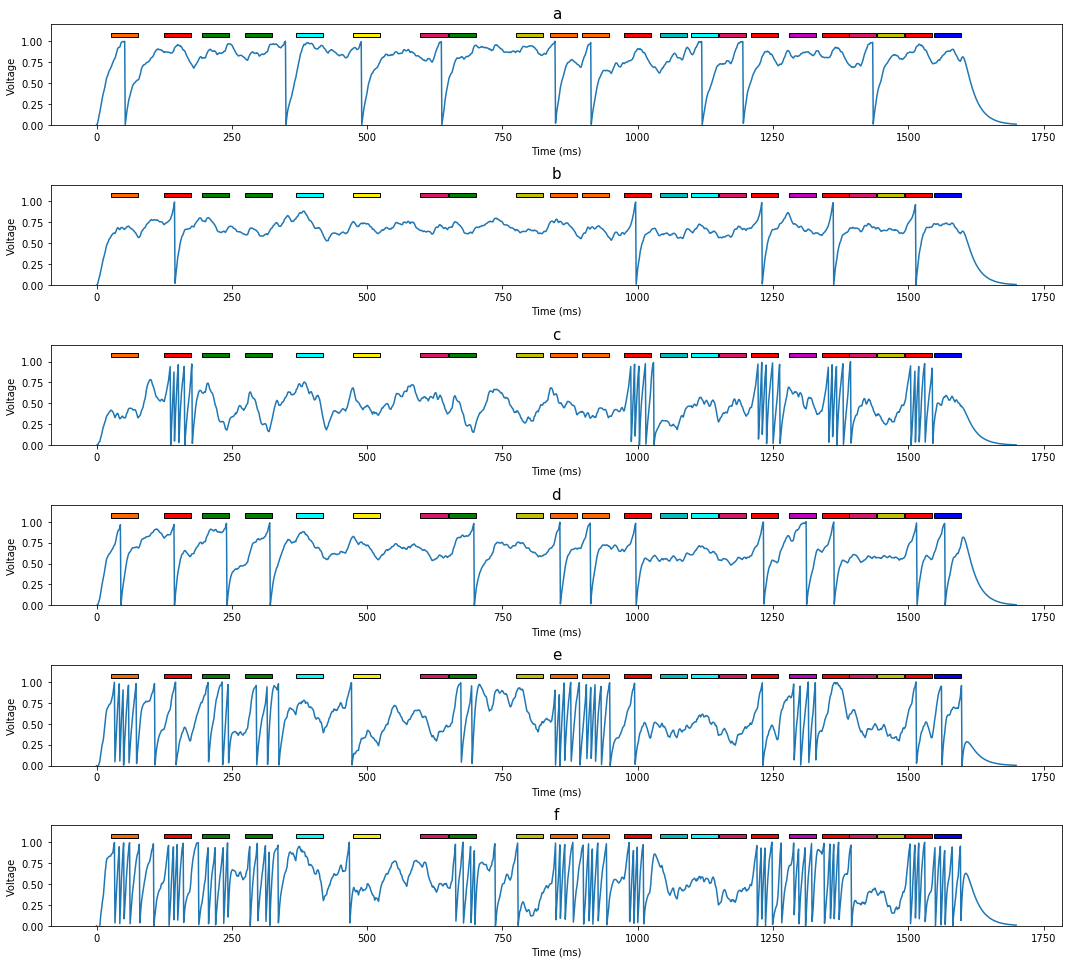

In [2]:
multi_Vplot(row = 6, col = 1, data = "test_data.npz", omega = ["untrained_omega.npy", "corr_omega1F1S_list.npy", "corr_omega1F5S_list.npy", "corr_omega5F1S_list.npy", "corr_omega5FmS_list.npy", "corr_omega5F5S_list.npy"], cycle = [None, 999, 999, 999, 999, 999], title = ['a', 'b', 'c', 'd', 'e', 'f'], fig_width = 15, fig_height = 13.5) 


$\textbf{Figure 2: Voltage traces of the postsynaptic neuron before and after correlation-based training. (a)}$ Before training. $\textbf{(b and c)}$ Identification of one clue (red) by a trained postsynaptic neuron with one spike (b, task A) and five spikes (c, task B). $\textbf{(d - f)}$ The postsynaptic neuron was trained to identify five clues (red, blue, green, purple, and orange) with one spike per clue (d, task C), different number of spikes for different clues (e, task D), and five spikes per clue (f, task E). Note that there are still some random spikes on background activity and distractors in tasks D and E.

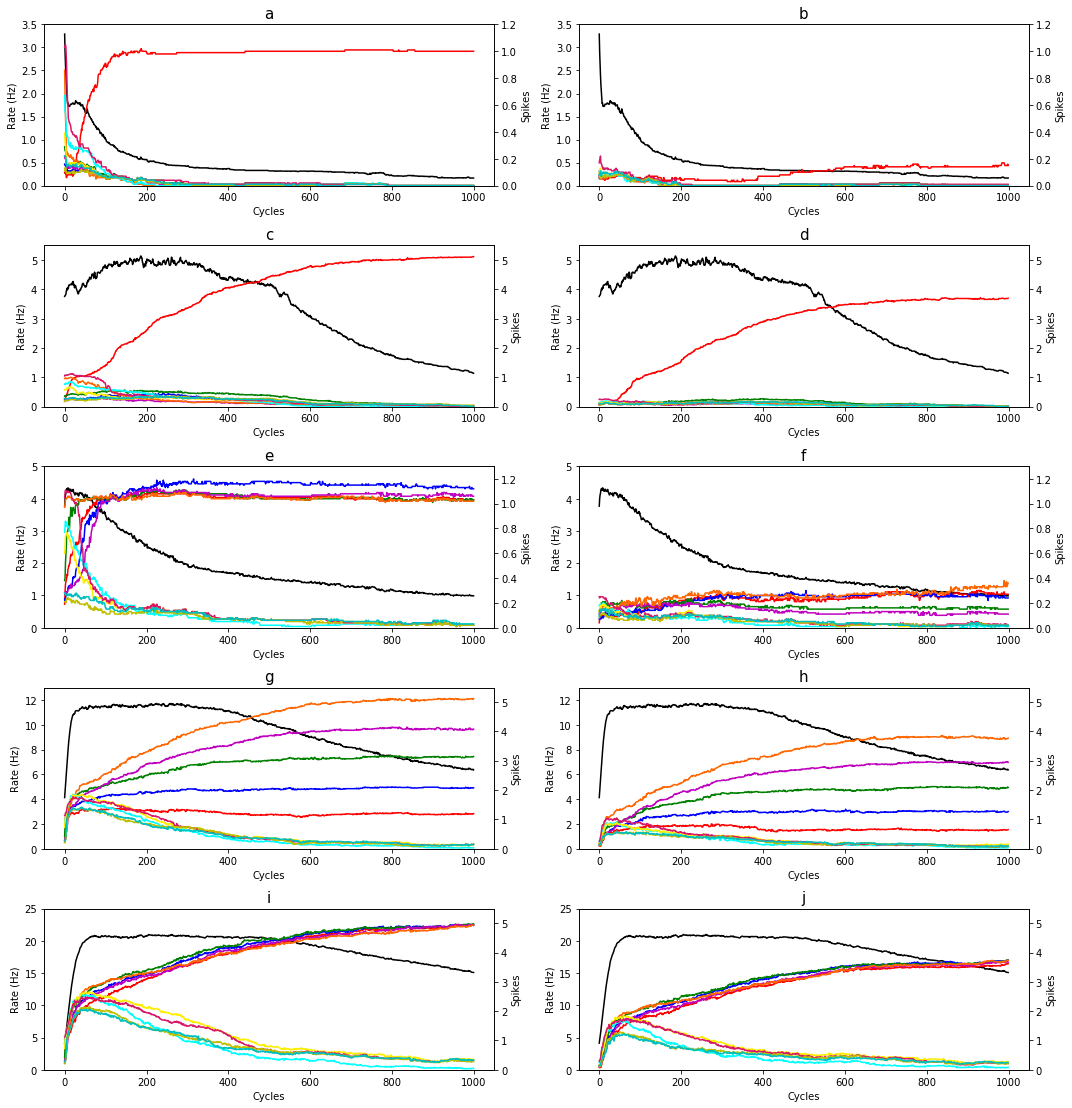

In [4]:
fig, axs = plt.subplots()
plt_learning_curve('corr_neural_responses_1F1S.npz', ax = plt.subplot(521), fig_width = 15, fig_height = 15.5, title = 'a', l_ylim = 3.5, r_ylim = 1.2, xlim = 0)
plt_learning_curve('noisy_corr_neural_responses_1F1S.npz', ax = plt.subplot(522), fig_width = 15, fig_height = 15.5, title = 'b', l_ylim = 3.5, r_ylim = 1.2, xlim = 0) 
plt_learning_curve('corr_neural_responses_1F5S.npz', ax = plt.subplot(523), fig_width = 15, fig_height = 15.5, title = 'c', l_ylim = 5.5, r_ylim = 5.5, xlim = 0) 
plt_learning_curve('noisy_corr_neural_responses_1F5S.npz', ax = plt.subplot(524), fig_width = 15, fig_height = 15.5, title = 'd', l_ylim = 5.5, r_ylim = 5.5, xlim = 0)
plt_learning_curve('corr_neural_responses_5F1S.npz', ax = plt.subplot(525), fig_width = 15, fig_height = 15.5, title = 'e', l_ylim = 5, r_ylim = 1.3, xlim = 0)
plt_learning_curve('noisy_corr_neural_responses_5F1S.npz', ax = plt.subplot(526), fig_width = 15, fig_height = 15.5, title = 'f', l_ylim = 5, r_ylim = 1.3, xlim = 0)
plt_learning_curve('corr_neural_responses_5FmS.npz', ax = plt.subplot(527), fig_width = 15, fig_height = 15.5, title = 'g', l_ylim = 13, r_ylim = 5.5, xlim = 0)
plt_learning_curve('noisy_corr_neural_responses_5FmS.npz', ax = plt.subplot(528), fig_width = 15, fig_height = 15.5, title = 'h', l_ylim = 13, r_ylim = 5.5, xlim = 0) 
plt_learning_curve('corr_neural_responses_5F5S.npz', ax = plt.subplot(529), fig_width = 15, fig_height = 15.5, title = 'i', l_ylim = 25, r_ylim = 5.5, xlim = 0)
plt_learning_curve('noisy_corr_neural_responses_5F5S.npz', ax = plt.subplot(5,2,10), fig_width = 15, fig_height = 15.5, title = 'j', l_ylim = 25, r_ylim = 5.5, xlim = 0) 
fig.tight_layout()


$\textbf{Figure 3: Learning curves of correlation-based learning rule. (a, c, e, g, and i)}$ Neural responses computed with noise-free features for task A, B, C, D, and E, respectively. $\textbf{(b, d, f, h, and j)}$ Neural responses computed with noise-added features for task A, B, C, D, and E, respectively. The neural responses of the postsynaptic neuron are reduced in response to the noise-added clues. The color of the learning curves are corresponding to the color coded features and the black curves are the background activity. The left y-axis is the rate of postsynaptic neuron firing in response to the background activity and the right y-axis is the average number of spikes over 100 probe trials for each color coded features (both clues and distractors).

### 3.2 Multi-spike tempotron algorithm is not working for more difficult tasks?

The postsynaptic neuron trained with multi-spike tempotron algorithm can identify the clue in task A (Fig. 4a) and the performance became optimal at about cycle 200 of the training (Fig. 5a). By computing the neural responses with noise-added features, the learning effect was reduced significantly but not as much if compared to the same task trained by correlation-based learning (Fig. 3b). This indicates that the multi-spike tempotron has some advantages over the correlation-based learning, at least in this task. 

However, the multi-spike tempotron algorithm failed to accomplish the harder tasks, namely tasks B and C. The postsynaptic neuron did not fire five spikes in response to the red clue as required by the task B (Fig. 4b) and no meaningful learning effect can be observed from the learning curves (Fig. 5c). Similarly, the postsynaptic neuron failed to identify the five clues in task C (Fig. 4c). Also, no learning effect is observed based on the task C's learning curves (Fig. 5d).

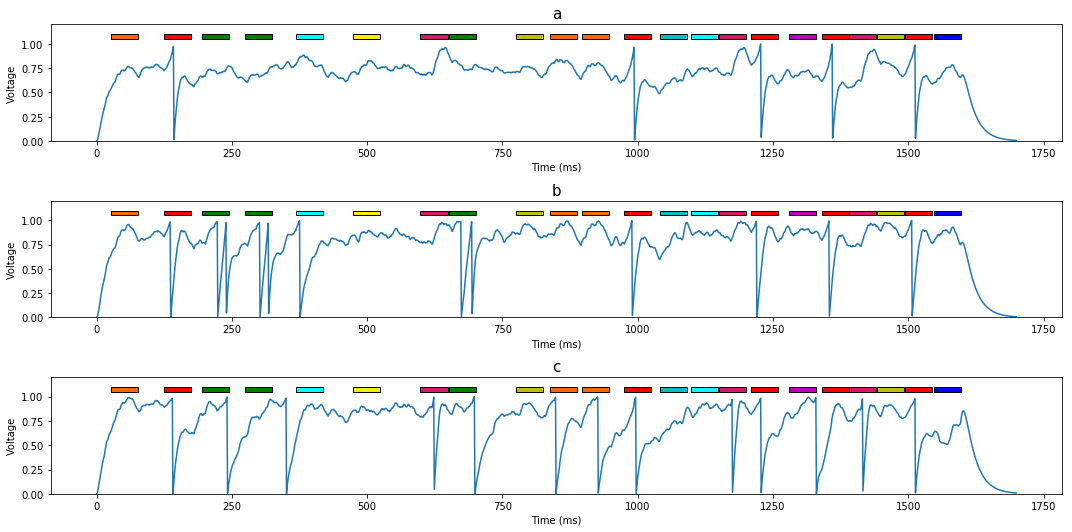

In [5]:
multi_Vplot(row = 3, col = 1, data = "test_data.npz", omega = ["theta_omega1F1S_list.npy", "theta_omega1F5S_list.npy", "theta_omega5F1S_list.npy"], cycle = [999, 999, 999], title = ['a', 'b', 'c'], fig_width = 15, fig_height = 7.5) 


$\textbf{Figure 4: Voltage traces of the postsynaptic neuron after multi-spike tempotron training. (a)}$ Identification of one clue (red) by a trained postsynaptic neuron with one spike (task A). $\textbf{(b)}$ Failure of the postsynaptic neuron to identify the red clue with five spikes (task B). $\textbf{(c)}$ Failure of the postsynaptic neuron in identifying the five clues (red, blue, green, purple, and orange) with one spike per clue (task C).

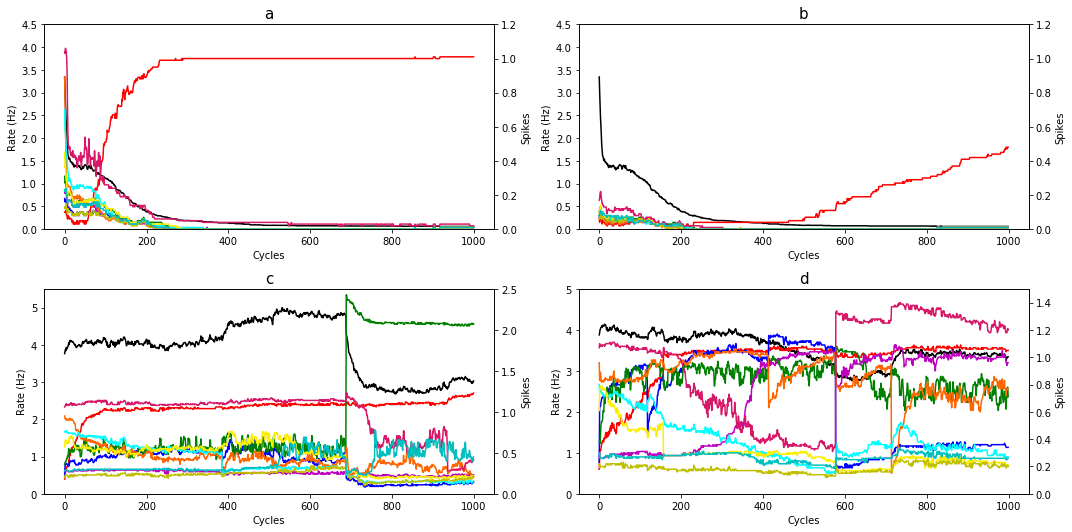

In [7]:
fig, axs = plt.subplots()
plt_learning_curve('theta_neural_responses_1F1S.npz', ax = plt.subplot(221), fig_width = 15, fig_height = 7.5, title = 'a', l_ylim = 4.5, r_ylim = 1.2, xlim = 0)
plt_learning_curve('noisy_theta_neural_responses_1F1S.npz', ax = plt.subplot(222), fig_width = 15, fig_height = 7.5, title = 'b', l_ylim = 4.5, r_ylim = 1.2, xlim = 0) 
plt_learning_curve('theta_neural_responses_1F5S.npz', ax = plt.subplot(223), fig_width = 15, fig_height = 7.5, title = 'c', l_ylim = 5.5, r_ylim = 2.5, xlim = 0)
plt_learning_curve('theta_neural_responses_5F1S.npz', ax = plt.subplot(224), fig_width = 15, fig_height = 7.5, title = 'd', l_ylim = 5, r_ylim = 1.5, xlim = 0) 
fig.tight_layout()


$\textbf{Figure 5: Learning curves of multi-spike tempotron learning rule. (a and b)}$ Neural responses computed with noise-free (a) and noise-added features (b) for task A. $\textbf{(c and d)}$ Postsynaptic neural responses for task B (c) and task C (d) after multi-spike tempotron training. The curves for tasks B and C were not converged and no learning effect observed.

## 4 Discussions

In all tasks, the postsynaptic neuron only received the desired spike number as the feedback. When the desired spike number corresponded to five times the number of clues, the postsynaptic neuron trained with correlation-based learning rule learned to fire five spikes in the presence of the clues and remain silent otherwise (Fig. 2c and 2f). Similarly, the postsynaptic neuron can correctly assign different number of spikes in response to different clues in task D (Fig. 2e and 3g). With these results, the validity of the aggregate-label learning concept has been verified.

However, the feasibility of the multi-spike tempotron learning algorithm was not confirmed by this current project due to the failures in accomplishing the tasks B and C. For these failures, the most likely reason is the method used to identify the $t^\star$ cannot reliably identify the correct $t^\star$. The author defined the $v_{\text{max}}(\vartheta)$ as local subthreshold voltage maximum (Robert Gütig, 2016) instead of subthreshold maximum voltage value described in section 2.4.3.1. The term "local" indicates that the $t^\star$ has a defined occurring time window, which was not described in detail by the suthor, and this may be the key point that caused the failure of the multi-spike tempotron code in this project. This reason makes sense as the multi-spike tempotron code worked for task A, which was the easiest task among the five tasks and might not require the high precision in determining $t^\star$. As task gets harder, the multi-spike tempotron code requires the precise $t^\star$ in order to control the multiple spikes and find the exact gradient towards the desired spike number. Hence, the failure in determining the precise $t^\star$ led to the failures of multi-spike tempotron algorithm in tasks B and C.

Besides, the tasks D and E trained with multi-spike tempotron are not presented in this report because the trainings were running for more than five days and still not completed. Therefore, the trainings were stopped and considered as failures. This might due to the computational expensive code of multi-spike tempotron that tried to compute the exact gradient for a large number of spikes in tasks D and E with the recursive equations (Eq. 18 and 19). In addition, the lack of precision in determining the $t^\star$ mentioned above might also contribute to the long computational time of multi-spike tempotron as the postsynaptic neuron did not learn effectively and thus triggering more error trials. 

In contrast, the computational time for correlation-based learning was consistent for all tasks, which was not depending on the difficulty of the task as in multi-spike tempotron. Also, the training time of corrrelation-based learning was much shorter compared to multi-spike tempotron. In short, the multi-spike tempotron might not be appropriate to use for training that involves controlling of a large number of spikes, unless the computational time can be significantly reduced if the $t^\star$ can be determined precisely.

Lastly, the noise-added features were only used for computing the neural responses after training. This can test the flexibility of the trained neuron in identifying the clues with distorted activity pattern. However, the noise-added features can also be used during the training to examine the flexibility of the learning rules. An effective learning algorithm should have a relatively high performance in executing different tasks under different conditions.


## 5 Appendix

### 5.1 Code files


$\textbf{(A) Data_Generation_with_Precomputed_Inputs.ipynb & main_gen.py} \\
\qquad \text{Code for generating presynaptic input spikes data with normalized PSP kernel, no information of synaptic efficacy is needed or computed.}$

$\textbf{(B) Correlation_Based_Learning_Algorithm.ipynb} \\
\qquad \text{Code for training the neuron with correlation-based learning rule.}$

$\textbf{(C) Theta_Critical_Gradient_Algorithm.ipynb} \\
\qquad \text{Code for training the neuron with multi-spike tempotron learning rule.}$

$\textbf{(D) Learning Curve for Multi-Spike Tempotron.ipynb} \\
\qquad \text{Code for computing the neural responses needed for plotting learning curves.}$

$\textbf{(E) V_trace.py} \\
\qquad \text{Code for plotting voltage traces.}$

$\textbf{(F) l_curve.py} \\
\qquad \text{Code for plotting learning curves.}$

### 5.2 Derivation

#### 5.2.1 Derivation of Eq. 11 and 12

From Eq. 10, 

\begin{align*}
\vartheta_i^{\star'} &= \frac{\text{d}}{\text{d}\omega_i}V(t^{\star}) \\
&= \frac{\text{d}}{\text{d}\omega_i}V(\omega_i, t_s^1, t_s^2,..., t_s^m, t^{\star}) \Big|_{t^{\star}} \\
&= \frac{∂}{∂\omega_i}V(t^{\star}) + \frac{∂}{∂t_s^1}V(t^{\star}) \frac{\text{d}}{\text{d}\omega_i}t_s^1 + \frac{∂}{∂t_s^2}V(t^{\star}) \frac{\text{d}}{\text{d}\omega_i}t_s^2 +...+ \frac{∂}{∂t_s^m}V(t^{\star}) \frac{\text{d}}{\text{d}\omega_i}t_s^m + \frac{∂}{∂t^{\star}}V(t^{\star}) \frac{\text{d}}{\text{d}\omega_i}t^{\star} 
\end{align*}

As $V(t^\star)$ is a local maximum with $∂V(t^\star)/∂t^\star = 0$, the last term is dropped and thus
\begin{align*} \vartheta_i^{\star'} = \frac{∂}{∂ \omega_i} V(t^\star) + \sum_{j=1}^m \frac{∂}{∂ t_s^j} V(t^\star) \frac{\text{d}}{\text{d} \omega_i} t_s^j &\qquad (\text{Eq. } 11) \end{align*}

Eq. 12 is derived in a similar way as Eq. 11, but the last term is kept:

\begin{align*}
\frac{\text{d}}{\text{d}\omega_i}V(t_s^k) &= \frac{\text{d}}{\text{d}\omega_i}V(\omega_i, t_s^1, t_s^2,..., t_s^k) \Big|_{t_s^k} \\
&= \frac{∂}{∂\omega_i}V(t_s^k) + \frac{∂}{∂t_s^1}V(t_s^k) \frac{\text{d}}{\text{d}\omega_i}t_s^1 + \frac{∂}{∂t_s^2}V(t_s^k) \frac{\text{d}}{\text{d}\omega_i}t_s^2 +...+ \frac{∂}{∂t_s^k}V(t_s^k) \frac{\text{d}}{\text{d}\omega_i}t_s^k \\
&= \frac{∂}{∂ \omega_i} V(t_s^k) + \sum_{j=1}^k \frac{∂}{∂ t_s^j} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^j &&(\text{Eq. } 12)
\end{align*}

#### 5.2.2 Derivation of Eq. 13 from Eq. 12

\begin{align*} 
\frac{\text{d}}{\text{d} \omega_i} V(t_s^k) &= \frac{∂}{∂ \omega_i} V(t_s^k) + \sum_{j=1}^k \frac{∂}{∂ t_s^j} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^j  &&(\text{Eq. } 12) \\ 
\vartheta_i^{\star'} &= \frac{∂}{∂ \omega_i} V(t_s^k) + \sum_{j=1}^k \frac{∂}{∂ t_s^j} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^j \\
\vartheta_i^{\star'} &= \frac{∂}{∂ \omega_i} V(t_s^k) + \sum_{j=1}^{k-1} \frac{∂}{∂ t_s^j} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^j + \frac{∂}{∂ t_s^k} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^k \\
\frac{∂}{∂ t_s^k} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^k &= \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^k) - \sum_{j=1}^{k-1} \frac{∂}{∂ t_s^j} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^j \\
\dot{V}(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^k &= \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^k) - \sum_{j=1}^{k-1} \frac{∂}{∂ t_s^j} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^j \\
\frac{\text{d}}{\text{d} \omega_i} t_s^k &= \frac{1}{\dot{V}(t_s^k)} \bigg[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^k) - \sum_{j=1}^{k-1} \frac{∂}{∂ t_s^j} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^j \bigg] &&(\text{Eq. } 13)
\end{align*}

#### 5.2.3 Derivation of $A_k$ (Eq. 16) and $B_k$ (Eq. 17)

\begin{align*}
\frac{\text{d}}{\text{d} \omega_i} t_s^k &= \frac{1}{\dot{V}(t_s^k)} \bigg[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^k) - \sum_{j=1}^{k-1} \frac{∂}{∂ t_s^j} V(t_s^k) \frac{\text{d}}{\text{d} \omega_i} t_s^j \bigg] &&(\text{Eq. } 13) \\
\frac{\text{d}}{\text{d} \omega_i} t_s^k &= \frac{1}{\dot{V}(t_s^k)} [ \vartheta_i^{\star'} A_k + B_k] &&(\text{Eq. } 15)
\end{align*}

$\textbf{When } k = 1$, $$\frac{\text{d}}{\text{d} \omega_i} t_s^1 = \frac{1}{\dot{V}(t_s^1)} \Big[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^1) \Big] $$

where $$A_1 = 1$$ and $$B_1 = - \frac{∂}{∂ \omega_i} V(t_s^1)$$

$\textbf{When } k = 2$, 
\begin{align*}
\frac{\text{d}}{\text{d} \omega_i} t_s^2 &= \frac{1}{\dot{V}(t_s^2)} \bigg[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^2) - \frac{∂}{∂ t_s^1} V(t_s^2) \frac{\text{d}}{\text{d} \omega_i} t_s^1 \bigg] \\
&= \frac{1}{\dot{V}(t_s^2)} \bigg[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^2) - \frac{∂}{∂ t_s^1} V(t_s^2) \frac{1}{\dot{V}(t_s^1)} \Big( \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^1) \Big) \bigg] \\
&= \frac{1}{\dot{V}(t_s^2)} \bigg[ \vartheta_i^{\star'} \Big( 1- \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \Big) - \frac{∂}{∂ \omega_i} V(t_s^2) + \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \frac{∂}{∂ \omega_i} V(t_s^1) \bigg]
\end{align*} 

where \begin{align*} A_2 &= 1- \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \\ 
&= 1- \frac{A_1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \end{align*}

and \begin{align*} B_2 &= - \frac{∂}{∂ \omega_i} V(t_s^2) + \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \frac{∂}{∂ \omega_i} V(t_s^1) \\ 
&= - \frac{∂}{∂ \omega_i} V(t_s^2) - \frac{B_1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \end{align*}

$\textbf{When } k = 3$, 
\begin{align*}
\frac{\text{d}}{\text{d} \omega_i} t_s^3 &= \frac{1}{\dot{V}(t_s^3)} \bigg[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^3) - \sum_{j=1}^{2} \frac{∂}{∂ t_s^j} V(t_s^3) \frac{\text{d}}{\text{d} \omega_i} t_s^j \bigg] \\
&= \frac{1}{\dot{V}(t_s^3)} \bigg[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^3) - \frac{∂}{∂ t_s^1} V(t_s^3) \frac{\text{d}}{\text{d} \omega_i} t_s^1 - \frac{∂}{∂ t_s^2} V(t_s^3) \frac{\text{d}}{\text{d} \omega_i} t_s^2 \bigg] \\
&= \frac{1}{\dot{V}(t_s^3)} \bigg[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^3) - \frac{∂}{∂ t_s^1} V(t_s^3) \frac{1}{\dot{V}(t_s^1)} \Big[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^1) \Big] \\
&\qquad - \frac{∂}{∂ t_s^2} V(t_s^3) \frac{1}{\dot{V}(t_s^2)} \Big[ \vartheta_i^{\star'} \Big( 1- \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \Big) - \frac{∂}{∂ \omega_i} V(t_s^2) + \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \frac{∂}{∂ \omega_i} V(t_s^1) \Big] \bigg] \\
&= \frac{1}{\dot{V}(t_s^3)} \bigg[ \vartheta_i^{\star'} \Big( 1- \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^3) - \frac{1}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) + \frac{1}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \Big) \\
&\qquad - \frac{∂}{∂ \omega_i} V(t_s^3) + \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^3) \frac{∂}{∂ \omega_i} V(t_s^1) + \frac{1}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) \frac{∂}{∂ \omega_i} V(t_s^2) - \frac{1}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \frac{∂}{∂ \omega_i} V(t_s^1) \bigg]
\end{align*}

where \begin{align*} A_3 &= 1- \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^3) - \frac{1}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) + \frac{1}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \\
&= 1- \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^3) - \frac{1}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) \Big[ 1- \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \Big] \\
&= 1- \frac{A_1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^3) - \frac{A_2}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) \\
&= 1- \Big[ \frac{A_1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^3) + \frac{A_2}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) \Big] \\
A_k &= 1- \Big[ \frac{A_{k-2}}{\dot{V}(t_s^{k-2})} \frac{∂}{∂ t_s^{k-2}} V(t_s^k) + \frac{A_{k-1}}{\dot{V}(t_s^{k-1})} \frac{∂}{∂ t_s^{k-1}} V(t_s^k) \Big] \\
&= 1 - \sum_{j=1}^{k-1} \frac{A_j}{\dot{V}(t_s^j)} \frac{∂}{∂t_s^j} V(t_s^k) &&(\text{Eq. } 16)
\end{align*}

and \begin{align*} B_3 &= - \frac{∂}{∂ \omega_i} V(t_s^3) + \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^3) \frac{∂}{∂ \omega_i} V(t_s^1) + \frac{1}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) \frac{∂}{∂ \omega_i} V(t_s^2) - \frac{1}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \frac{∂}{∂ \omega_i} V(t_s^1) \\
&= - \frac{∂}{∂ \omega_i} V(t_s^3) - \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^3) \Big[ - \frac{∂}{∂ \omega_i} V(t_s^1) \Big] - \frac{1}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) \Big[ - \frac{∂}{∂ \omega_i} V(t_s^2) + \frac{1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^2) \frac{∂}{∂ \omega_i} V(t_s^1) \Big] \\
&= - \frac{∂}{∂ \omega_i} V(t_s^3) - \frac{B_1}{\dot{V}(t_s^1)} \frac{∂}{∂ t_s^1} V(t_s^3) - \frac{B_2}{\dot{V}(t_s^2)} \frac{∂}{∂ t_s^2} V(t_s^3) \\
B_k &= - \frac{∂}{∂ \omega_i} V(t_s^k) - \frac{B_{k-2}}{\dot{V}(t_s^{k-2})} \frac{∂}{∂ t_s^{k-2}} V(t_s^k) - \frac{B_{k-1}}{\dot{V}(t_s^{k-1})} \frac{∂}{∂ t_s^{k-1}} V(t_s^k) \\
&= - \frac{∂}{∂ \omega_i} V(t_s^k) - \Big[ \frac{B_{k-2}}{\dot{V}(t_s^{k-2})} \frac{∂}{∂ t_s^{k-2}} V(t_s^k) + \frac{B_{k-1}}{\dot{V}(t_s^{k-1})} \frac{∂}{∂ t_s^{k-1}} V(t_s^k) \Big] \\
&= - \frac{∂}{∂\omega_i} V(t_s^k) - \sum_{j=1}^{k-1} \frac{B_j}{\dot{V}(t_s^j)} \frac{∂}{∂t_s^j} V(t_s^k) &&(\text{Eq. } 17)
\end{align*}

##### 5.2.3.1 Proof by Induction

To justify the $A_k$ (Eq. 16) and $B_k$ (Eq. 17) derived above, assume $\forall j \leq n: \frac{\text{d}}{\text{d} \omega_i} t_s^j = \frac{1}{\dot{V}(t_s^j)} [\vartheta_i^{\star'}A_j + B_j] $ for $n = k$.

\begin{align*} &\text{When } n=k+1, \\
&\quad \frac{\text{d}}{\text{d} \omega_i} t_s^{k+1} = \frac{1}{\dot{V}(t_s^{k+1})} \bigg[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^{k+1}) - \sum_{j=1}^{k} \frac{∂}{∂ t_s^j} V(t_s^{k+1}) \frac{\text{d}}{\text{d} \omega_i} t_s^j \bigg] \\
&\qquad \qquad = \frac{1}{\dot{V}(t_s^{k+1})} \bigg[ \vartheta_i^{\star'} - \frac{∂}{∂ \omega_i} V(t_s^{k+1}) - \sum_{j=1}^{k} \frac{∂}{∂ t_s^j} V(t_s^{k+1}) \frac{1}{\dot{V}(t_s^j)} (\vartheta_i^{\star'}A_j + B_j) \bigg] \\
&\qquad \qquad = \frac{1}{\dot{V}(t_s^{k+1})} \bigg[ \vartheta_i^{\star'} \Big( 1- \sum_{j=1}^{k} \frac{A_j}{\dot{V}(t_s^j)} \frac{∂}{∂ t_s^j} V(t_s^{k+1}) \Big) - \frac{∂}{∂ \omega_i} V(t_s^{k+1}) - \sum_{j=1}^{k} \frac{B_j}{\dot{V}(t_s^j)} \frac{∂}{∂ t_s^j} V(t_s^{k+1}) \bigg] \\
&\text{where } \\
&\qquad A_{k+1} = 1 - \sum_{j=1}^k \frac{A_j}{\dot{V}(t_s^j)} \frac{∂}{∂t_s^j} V(t_s^{k+1}) && (\text{Proved})\\
&\text{and } \\
&\qquad B_{k+1} = - \frac{∂}{∂\omega_i} V(t_s^{k+1}) - \sum_{j=1}^k \frac{B_j}{\dot{V}(t_s^j)} \frac{∂}{∂t_s^j} V(t_s^{k+1}) && (\text{Proved})
\end{align*}

#### 5.2.4 Expression of $\vartheta_i^{\star'}$ in terms of $A_{\star}$ and $B_{\star}$

By inserting Eq. 15 into Eq. 11, we obtain

\begin{align*}
\vartheta_i^{\star'} &= \frac{∂}{∂ \omega_i} V(t^\star) + \sum_{j=1}^m \frac{∂}{∂ t_s^j} V(t^\star) \frac{1}{\dot{V}(t_s^j)} [\vartheta_i^{\star'}A_j + B_j] \\
\vartheta_i^{\star'} &= \frac{∂}{∂ \omega_i} V(t^\star) + \vartheta_i^{\star'} \sum_{j=1}^m \frac{A_j}{\dot{V}(t_s^j)} \frac{∂}{∂ t_s^j} V(t^\star) + \sum_{j=1}^m \frac{B_j}{\dot{V}(t_s^j)} \frac{∂}{∂ t_s^j} V(t^\star) \\
\vartheta_i^{\star'} - \vartheta_i^{\star'} \sum_{j=1}^m \frac{A_j}{\dot{V}(t_s^j)} \frac{∂}{∂ t_s^j} V(t^\star) &= \frac{∂}{∂ \omega_i} V(t^\star) + \sum_{j=1}^m \frac{B_j}{\dot{V}(t_s^j)} \frac{∂}{∂ t_s^j} V(t^\star) \\
\vartheta_i^{\star'} \Big[ 1- \sum_{j=1}^m \frac{A_j}{\dot{V}(t_s^j)} \frac{∂}{∂ t_s^j} V(t^\star) \Big] &= - \Big[ -\frac{∂}{∂ \omega_i} V(t^\star) - \sum_{j=1}^m \frac{B_j}{\dot{V}(t_s^j)} \frac{∂}{∂ t_s^j} V(t^\star) \Big] \\
\vartheta_i^{\star'} A_{\star} &= - B_{\star} \\
\vartheta_i^{\star'} &= - \frac{B_{\star}}{A_{\star}} &&(\text{Eq. } 20)
\end{align*}

#### 5.2.5 Simplification of voltage calculation equation (Eq. 6) at spike time

At spike time $ t_x \in \{ t_s^1, t_s^2, t_s^3,..., t_s^m, t^\star \} $, $V(t) = V(t_x) = V(t^{\star}) = \vartheta^{\star}$ and Eq. 6 can be simplified as follows:

\begin{align*}
\vartheta^{\star} &= V(t_x) \\
&= V_o(t_x) - \vartheta^\star \sum_{t_s^j<{t_x}}\exp\bigg[\frac{-(t_x-t_s^j)}{\tau_\text{m}}\bigg] \\
\vartheta^{\star} + \vartheta^\star \sum_{t_s^j<{t_x}}\exp\bigg[\frac{-(t_x-t_s^j)}{\tau_\text{m}}\bigg] &= V_o(t_x) \\
\vartheta^{\star} \bigg(1+ \sum_{t_s^j<{t_x}}\exp\bigg[\frac{-(t_x-t_s^j)}{\tau_\text{m}}\bigg] \bigg) &= V_o(t_x) \\
\vartheta^{\star} &= \frac{V_o(t_x)}{1+ \sum_{t_s^j<{t_x}}\exp\big[\frac{-(t_x-t_s^j)}{\tau_\text{m}}\big]} \\
&= \frac{V_o(t_x)}{C_{t_x}} \\
V(t_x) &= \frac{V_o(t_x)}{C_{t_x}} &&(\text{Eq. } 21)
\end{align*}

where $$ C_{t_x} \equiv 1 + \sum_{t_s^j < t_x} \exp\bigg[ \frac{-(t_x-t_s^j)}{\tau_\text{m}} \bigg] $$ which is Eq. 22.

#### 5.2.6 Derivation of Eq. 23 - 25

Eq. 23 - 25 are derivatives of Eq. 21. 

##### 5.2.6.1 Derivation of Eq. 23 by quotient rule

Besides the simple derivation shown in section 2.4.3.1 (calculating $\vartheta^\star$-gradient), Eq. 23 can also be derived by using quotient rule:

\begin{align*}
\frac{∂}{∂ \omega_i} V_o(t_x) &= \sum_{t_i^j < t_x} K(t_x - t_i^j) \\
\frac{∂}{∂ \omega_i} C_{t_x} &= 0 
\end{align*}

\begin{align*}
\frac{∂}{∂ \omega_i} V(t_x) &= \frac{C_{t_x} \sum_{t_i^j < t_x} K(t_x - t_i^j)-0}{C_{t_x}^2} \\
&= \frac{1}{C_{t_x}} \sum_{t_i^j < t_x} K(t_x - t_i^j) &&(\text{Eq. } 23)
\end{align*}

##### 5.2.6.2 Derivation of Eq. 24 by quotient rule

\begin{align*}
\frac{∂}{∂ t_s^k} V_o(t_x) &= 0 \\
\frac{∂}{∂ t_s^k} C_{t_x} &= \exp \bigg[ \frac{-(t_x-t_s^k)}{\tau_\text{m}} \bigg] \frac{1}{\tau_\text{m}} 
\end{align*}

\begin{align*}
\frac{∂}{∂ t_s^k} V(t_x) &= \frac{0- V_o(t_x) \exp \big[ \frac{-(t_x-t_s^k)}{\tau_\text{m}} \big] \frac{1}{\tau_\text{m}}} {C_{t_x}^2} \\
&= \frac{-V_o(t_x)}{C_{t_x}^2} \frac{\exp \big[ \frac{-(t_x-t_s^k)}{\tau_\text{m}} \big]}{\tau_\text{m}} &&(\text{Eq. } 24)
\end{align*}

##### 5.2.6.3 Derivation of Eq. 25 by quotient rule

\begin{align*}
K(t_x-t_i^j) &= V_\text{norm}\bigg[\exp\bigg(-\frac{t_x-t_i^j}{\tau_\text{m}}\bigg)-\exp\bigg(-\frac{t_x-t_i^j}{\tau_\text{s}}\bigg)\bigg] \\
\frac{∂}{∂ t_x} K(t_x-t_i^j) &= V_\text{norm}\bigg[-\frac{1}{\tau_\text{m}} \exp\bigg(-\frac{t_x-t_i^j}{\tau_\text{m}}\bigg) + \frac{1}{\tau_\text{s}} \exp\bigg(-\frac{t_x-t_i^j}{\tau_\text{s}}\bigg)\bigg] \\
\end{align*}

For simplification, the term $\frac{∂}{∂ t_x} V_o(t_x)$ is used for the derivation of Eq. 25. However, the derivation of $\frac{∂}{∂ t_x} V_o(t_x)$ is needed for coding (code file C).

\begin{align*}
\frac{∂}{∂ t_x} V_o(t_x) &= \sum_{i=1}^N \omega_i \sum_{t_i^j < t_x} \frac{∂}{∂ t_x} K(t_x - t_i^j) \\
\frac{∂}{∂ t_x} V_o(t_x) &= \sum_{i=1}^N \omega_i \sum_{t_i^j < t_x} V_\text{norm}\bigg[\frac{\exp\big(-\frac{t_x-t_i^j}{\tau_\text{s}}\big)}{\tau_\text{s}} - \frac{\exp\big(-\frac{t_x-t_i^j}{\tau_\text{m}}\big)}{\tau_\text{m}} \bigg] && (\text{Needed for coding}) \\
\frac{∂}{∂ t_x} C_{t_x} &= -\frac{1}{\tau_\text{m}} \sum_{t_s^j < t_x} \exp \bigg[ \frac{-(t_x-t_s^j)}{\tau_\text{m}} \bigg] 
\end{align*}

\begin{align*}
\dot{V}(t_x) &= \frac{∂}{∂ t_x} V(t_x) \\
&= \frac{C_{t_x}\frac{∂}{∂ t_x} V_o(t_x) - V_o(t_x) \Big[ -\frac{1}{\tau_\text{m}} \sum_{t_s^j < t_x} \exp \big[ \frac{-(t_x-t_s^j)}{\tau_\text{m}} \big] \Big]} {C_{t_x}^2} \\
&= \frac{1}{C_{t_x}^2} \bigg[ C_{t_x}\frac{∂}{∂ t_x} V_o(t_x) + \frac{V_o(t_x)}{\tau_\text{m}} \sum_{t_s^j < t_x} \exp \Big[ \frac{-(t_x-t_s^j)}{\tau_\text{m}} \Big] \bigg] &&(\text{Eq. } 25)
\end{align*}

## 6 References

$\text{R. Gütig & H. Sompolinsky. The tempotron: a neuron that learns spike timing-based decisions. } Nat. Neuroscience \textbf{ 9(3)} \text{: 420-8 (2006).}$

$\text{R. Gütig. Spiking neurons can discover predictive features by aggregate-label learning. } Science \textbf{ 351} \text{: aab4113-1 - aab4113-11 (2016).}$